In [140]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
data=pd.read_csv("C:\\Users\\Dedshan Vimukthi\\Documents\\Dataset3\\Ckd_data.CSV")

In [71]:
data.head()

,id,'age','bp','sg','al','su','rbc','pc','pcc','ba',...,'pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,1,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,2,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,3,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,4,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [4]:
data.isnull().sum()

id           0
'age'        9
'bp'        12
'sg'        47
'al'        46
'su'        49
'rbc'      152
'pc'        65
'pcc'        4
'ba'         4
'bgr'       44
'bu'        19
'sc'        17
'sod'       87
'pot'       88
'hemo'      52
'pcv'       71
'wbcc'     106
'rbcc'     131
'htn'        2
'dm'         2
'cad'        2
'appet'      1
'pe'         1
'ane'        1
'class'      0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.head()

,id,'age','bp','sg','al','su','rbc','pc','pcc','ba',...,'pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,1,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,2,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,3,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,4,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [7]:
data.drop("id",axis=1,inplace=True)

In [8]:
data.head()

,'age','bp','sg','al','su','rbc','pc','pcc','ba','bgr',...,'pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [9]:
data.columns

Index([''age'', ''bp'', ''sg'', ''al'', ''su'', ''rbc'', ''pc'', ''pcc'',
       ''ba'', ''bgr'', ''bu'', ''sc'', ''sod'', ''pot'', ''hemo'', ''pcv'',
       ''wbcc'', ''rbcc'', ''htn'', ''dm'', ''cad'', ''appet'', ''pe'',
       ''ane'', ''class''],
      dtype='object')

In [10]:
data_num=data[["'age'","'bp'","'bgr'","'bu'","'sc'","'sod'","'pot'","'hemo'","'pcv'","'wbcc'","'rbcc'"]]

In [11]:
data_num.isnull().sum()

'age'       9
'bp'       12
'bgr'      44
'bu'       19
'sc'       17
'sod'      87
'pot'      88
'hemo'     52
'pcv'      71
'wbcc'    106
'rbcc'    131
dtype: int64

In [12]:
data_num["'age'"].fillna(data_num["'age'"].mean(),inplace=True)

C:\Users\Dedshan Vimukthi\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [13]:
for i in data_num:
    data_num[i].fillna(data_num[i].mean(),inplace=True)
    

In [14]:
data_num.isnull().sum()

'age'     0
'bp'      0
'bgr'     0
'bu'      0
'sc'      0
'sod'     0
'pot'     0
'hemo'    0
'pcv'     0
'wbcc'    0
'rbcc'    0
dtype: int64

In [15]:
data_num.head()

,'age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc'
0,48.0,80.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000
1,7.0,50.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435
2,62.0,80.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435
3,48.0,70.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000
4,51.0,80.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000


In [16]:
data_num.head()

,'age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc'
0,48.0,80.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000
1,7.0,50.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435
2,62.0,80.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435
3,48.0,70.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000
4,51.0,80.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000


<AxesSubplot:>

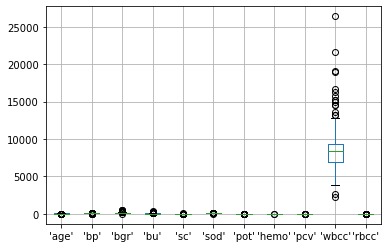

In [17]:
data_num.boxplot()

C:\Users\Dedshan Vimukthi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


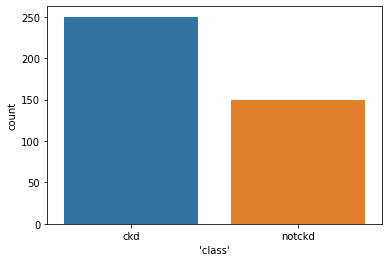

In [18]:
sns.countplot(data["'class'"])
plt.show()

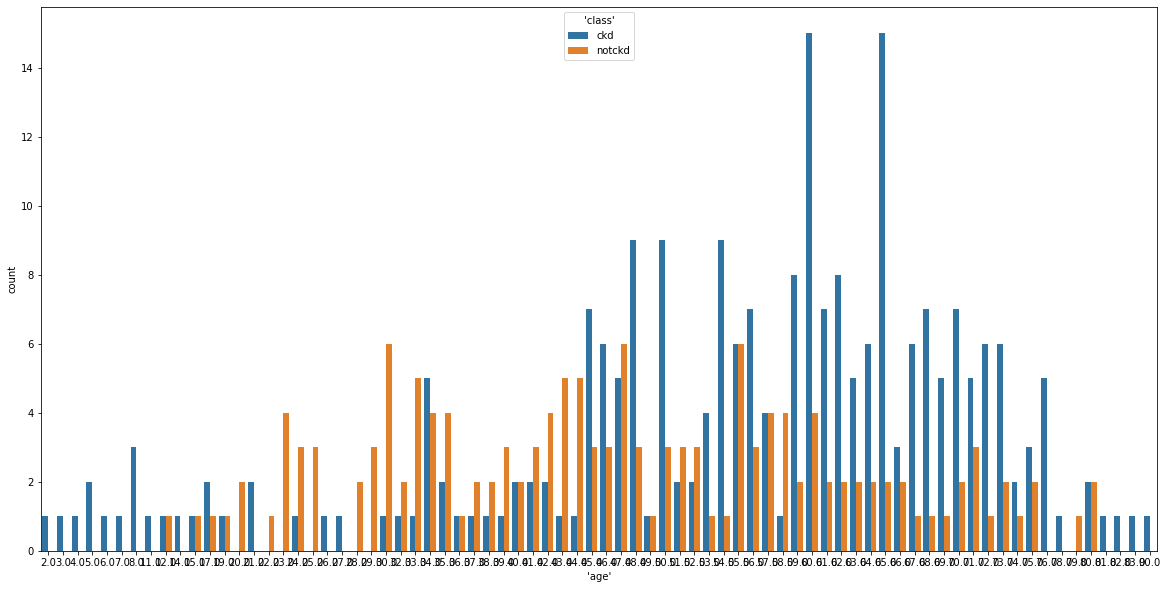

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(data=data,x="'age'",hue="'class'")
plt.show()

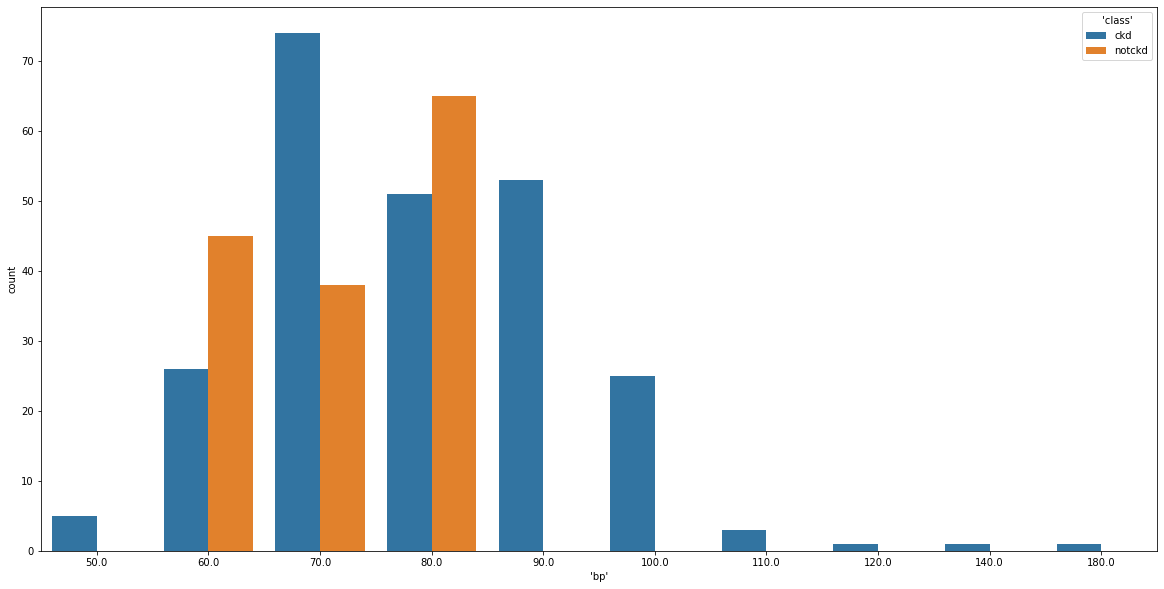

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(data=data,x="'bp'",hue="'class'")
plt.show()

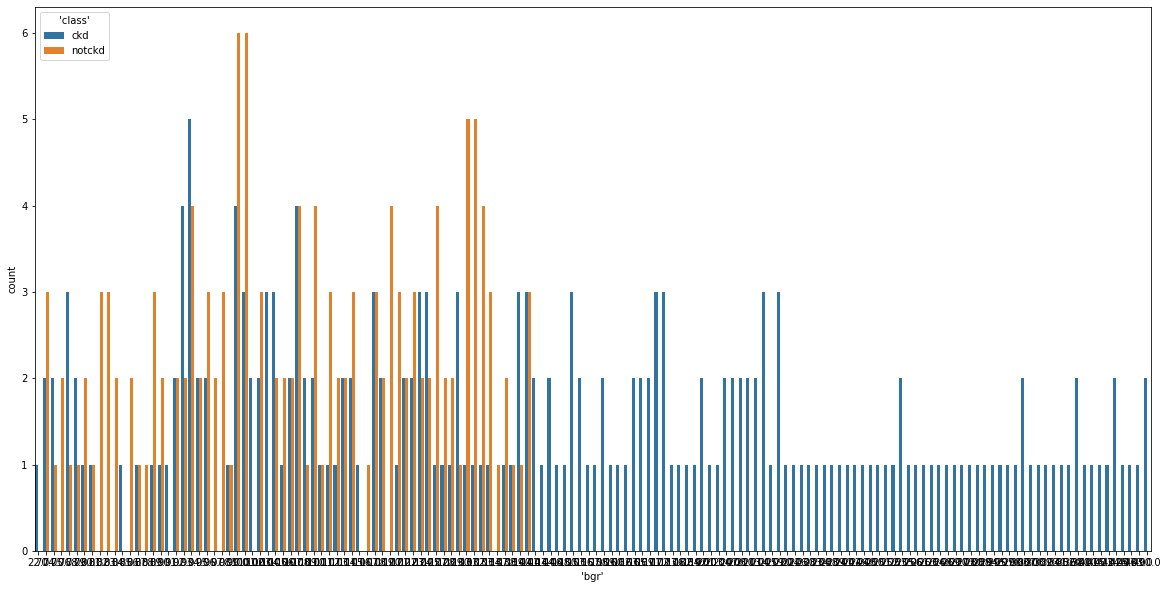

In [21]:
plt.figure(figsize=(20,10))
sns.countplot(data=data,x="'bgr'",hue="'class'")
plt.show()

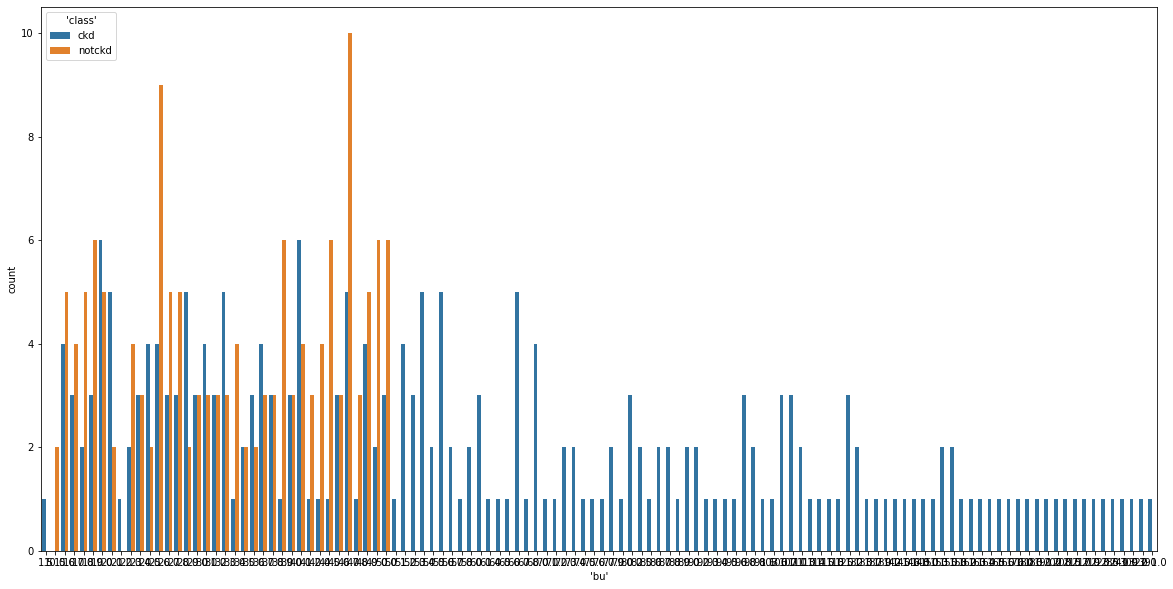

In [22]:
plt.figure(figsize=(20,10))
sns.countplot(data=data,x="'bu'",hue="'class'")
plt.show()

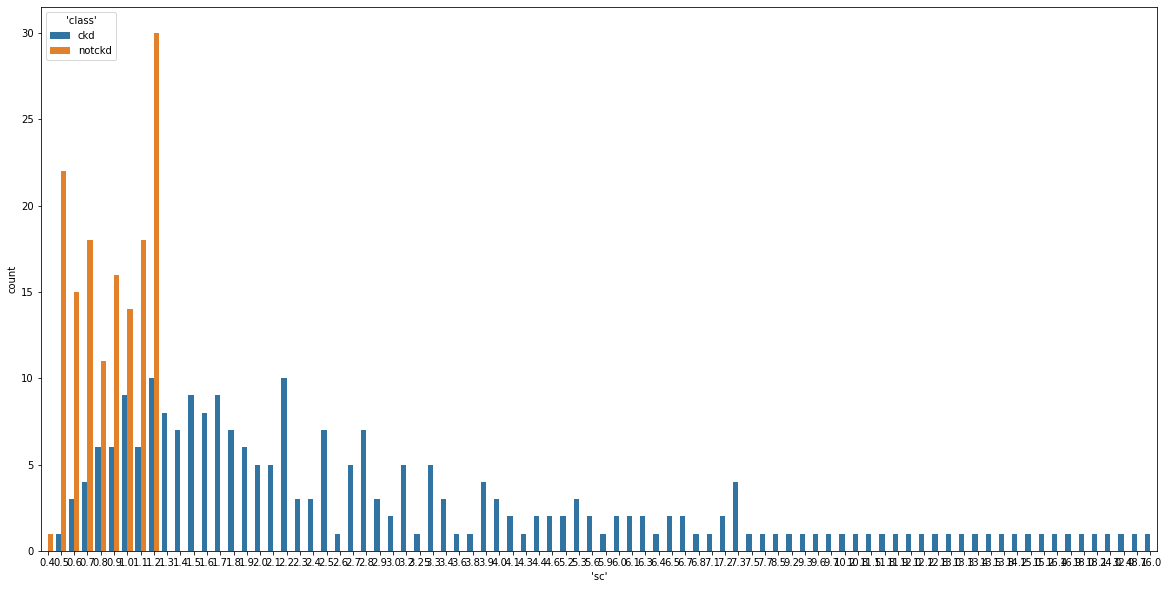

In [23]:
plt.figure(figsize=(20,10))
sns.countplot(data=data,x="'sc'",hue="'class'")
plt.show()

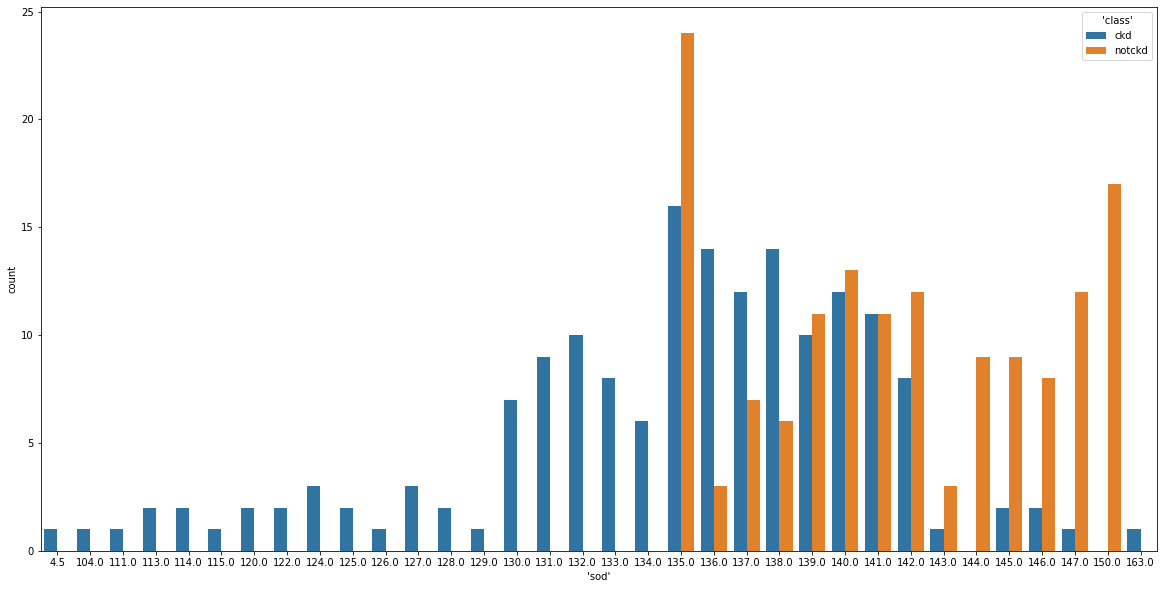

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(data=data,x="'sod'",hue="'class'")
plt.show()

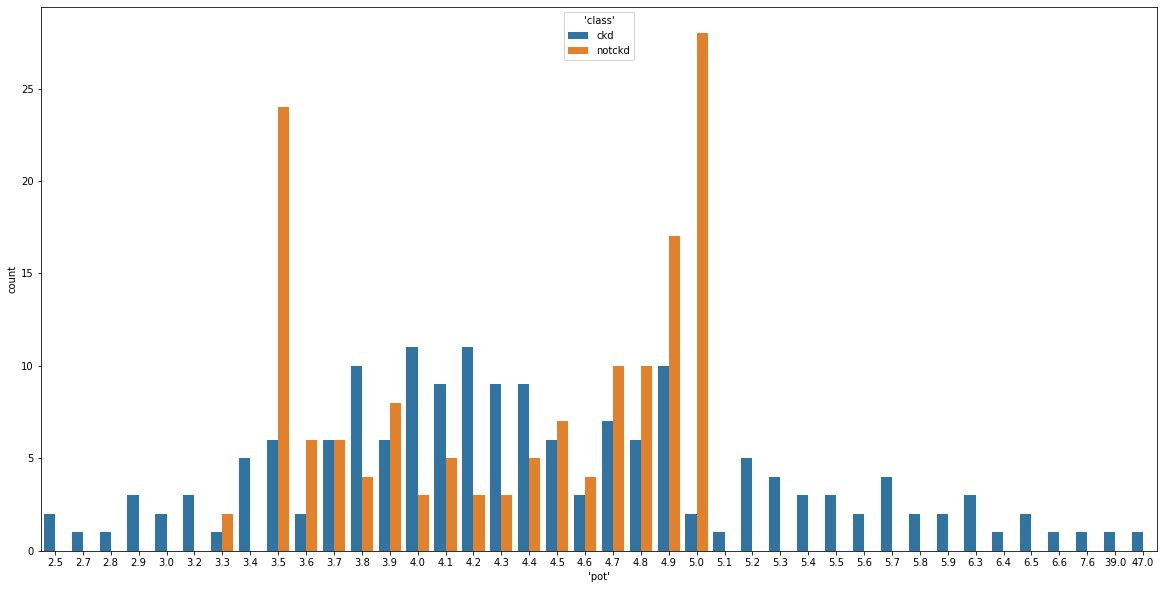

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(data=data,x="'pot'",hue="'class'")
plt.show()

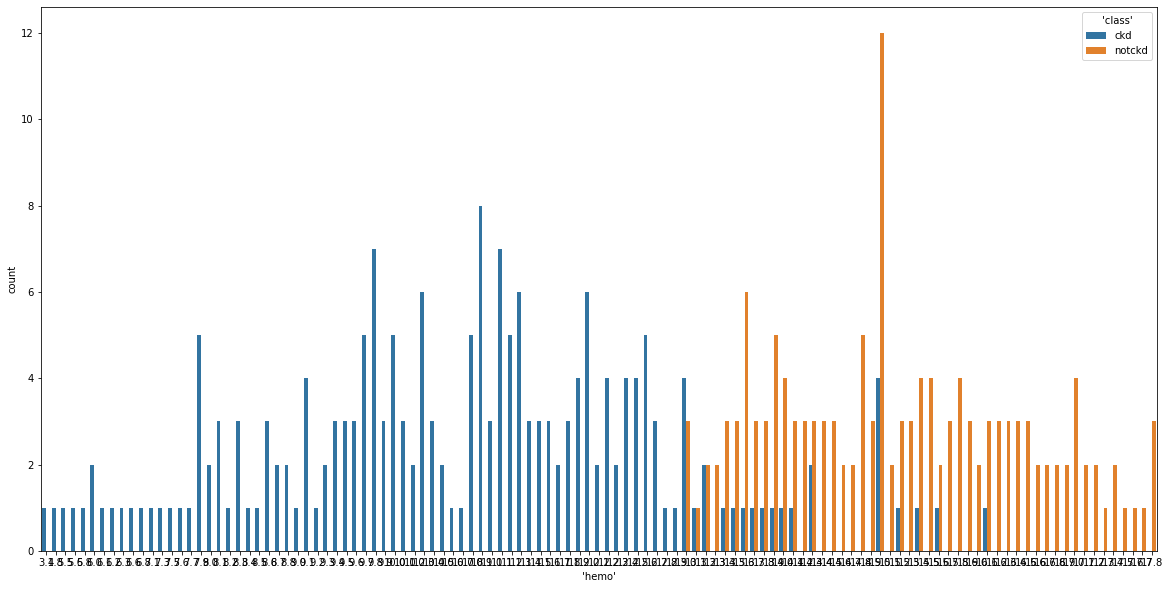

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(data=data,x="'hemo'",hue="'class'")
plt.show()

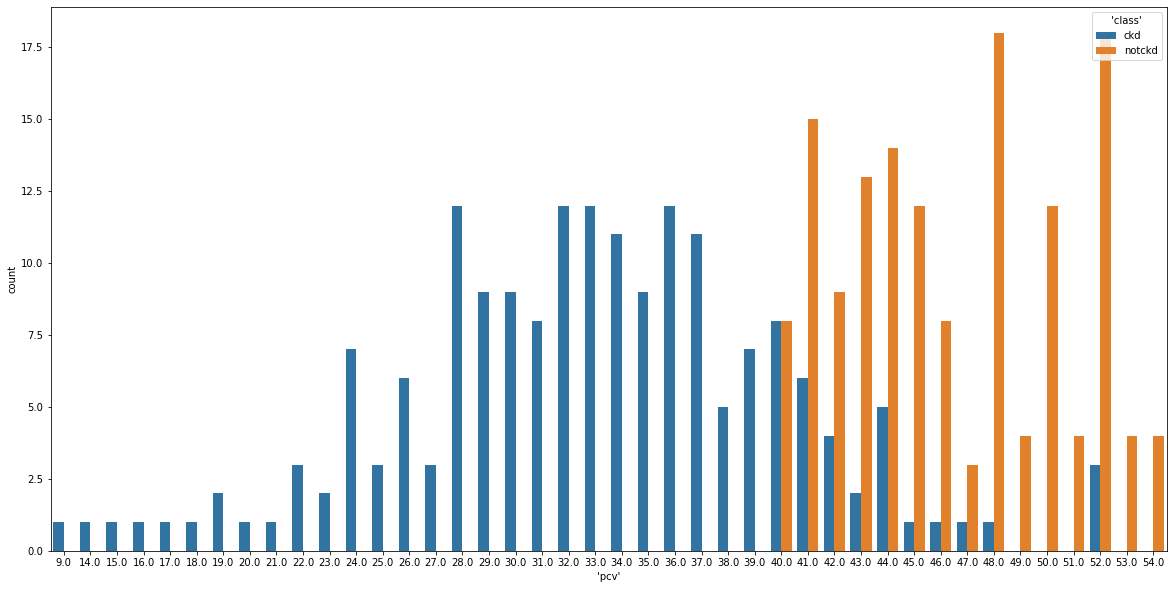

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(data=data,x="'pcv'",hue="'class'")
plt.show()

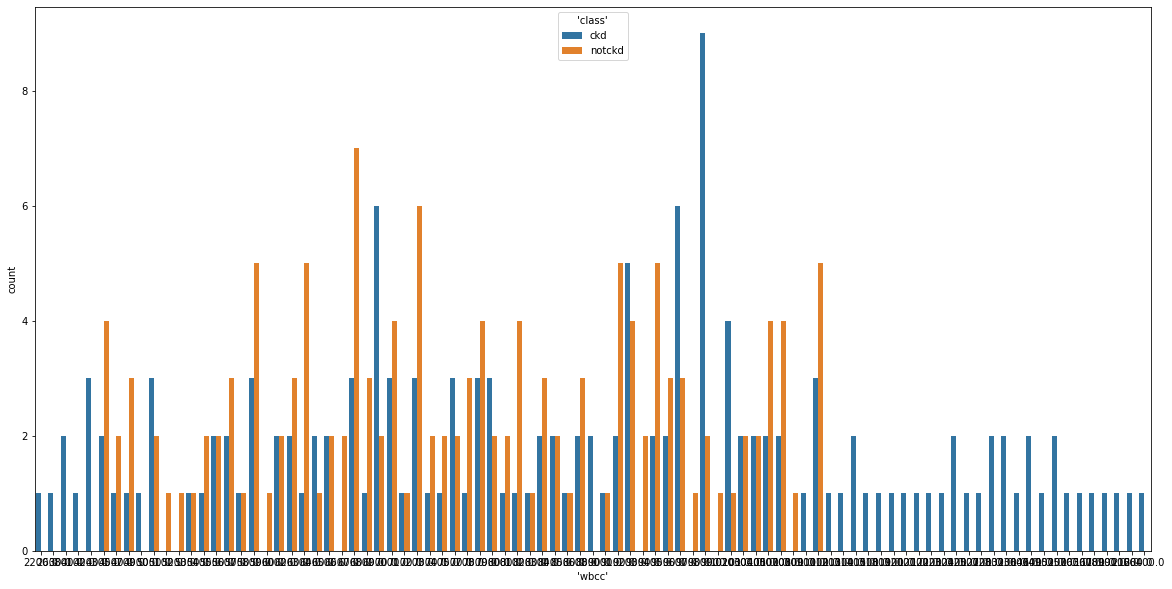

In [28]:
plt.figure(figsize=(20,10))
sns.countplot(data=data,x="'wbcc'",hue="'class'")
plt.show()

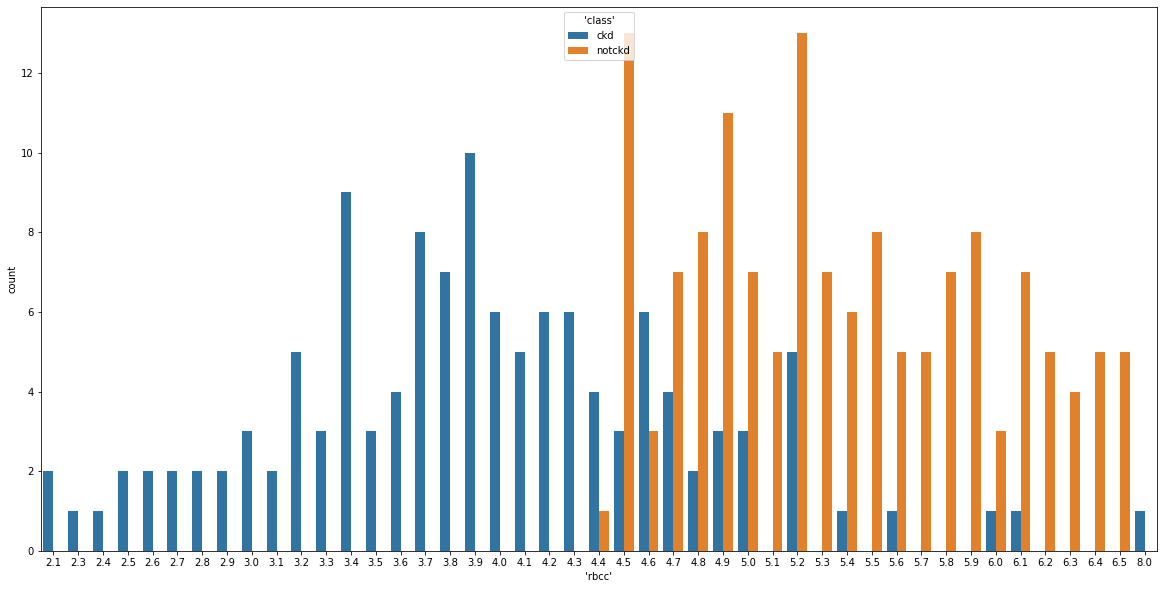

In [29]:
plt.figure(figsize=(20,10))
sns.countplot(data=data,x="'rbcc'",hue="'class'")
plt.show()

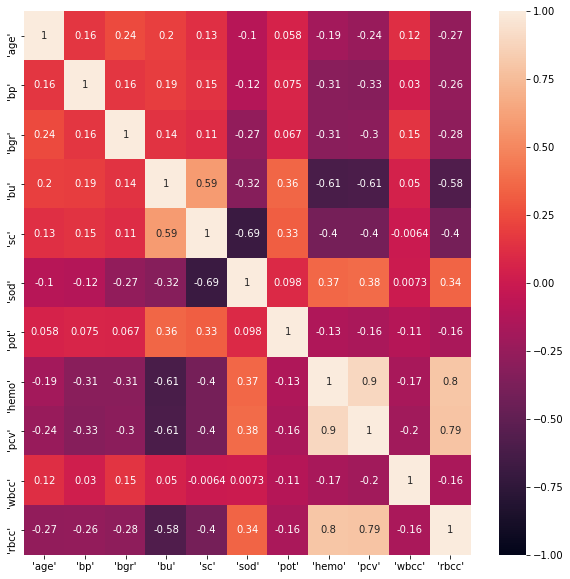

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(data[["'age'","'bp'","'bgr'","'bu'","'sc'","'sod'","'pot'","'hemo'","'pcv'","'wbcc'","'rbcc'"]].corr(),annot=True,vmin=-1,vmax=1)
plt.show()

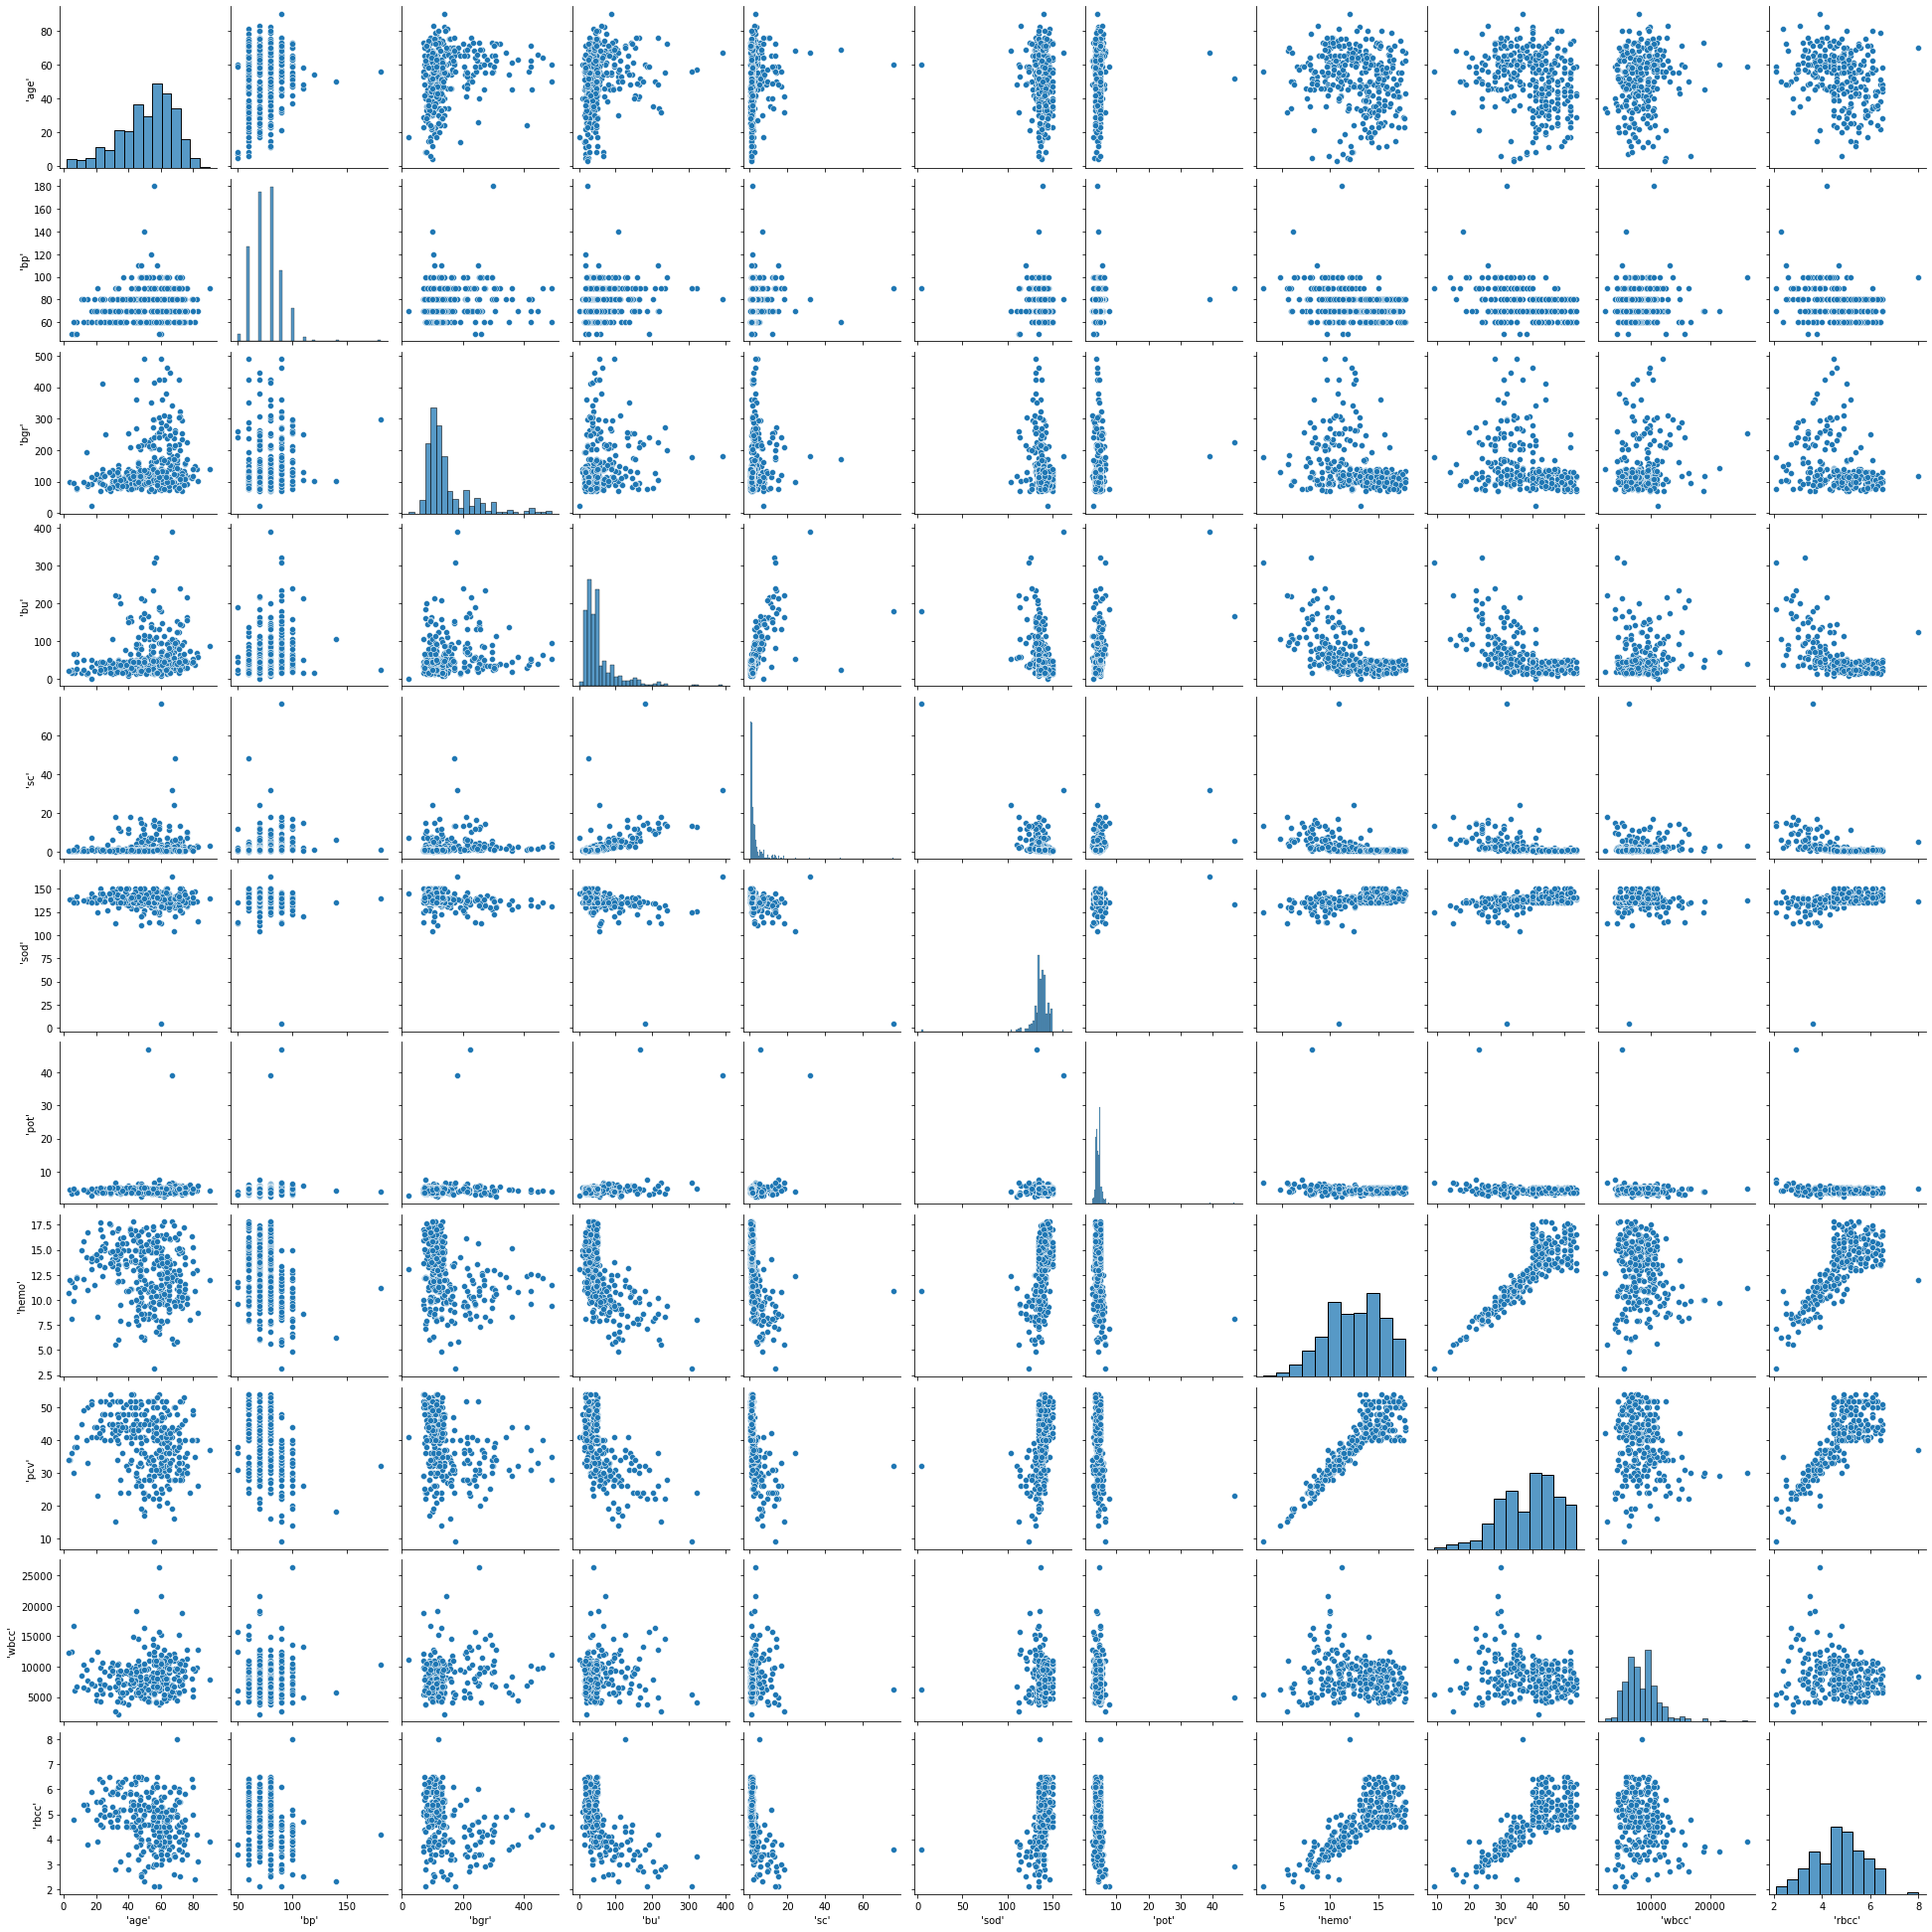

In [31]:
sns.pairplot(data[["'age'","'bp'","'bgr'","'bu'","'sc'","'sod'","'pot'","'hemo'","'pcv'","'wbcc'","'rbcc'"]])
plt.show()

In [32]:
data_num.head()

,'age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc'
0,48.0,80.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000
1,7.0,50.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435
2,62.0,80.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435
3,48.0,70.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000
4,51.0,80.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000


In [33]:
data_di=data[["'rbc'","'pc'","'pcc'","'ba'","'htn'","'dm'","'cad'","'appet'","'pe'","'ane'"]]

In [34]:
data_di.head()

,'rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane'
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no


In [35]:
data_di.isnull().sum()

'rbc'      152
'pc'        65
'pcc'        4
'ba'         4
'htn'        2
'dm'         2
'cad'        2
'appet'      1
'pe'         1
'ane'        1
dtype: int64

In [36]:
data_di["'rbc'"].isnull().sum()

152

In [37]:
data_di["'rbc'"].fillna(data_di["'rbc'"].mode(),inplace=True)

C:\Users\Dedshan Vimukthi\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [38]:
data_di["'rbc'"].isnull().sum()

151

In [39]:
data_di["'rbc'"].mode()

0    normal
dtype: object

In [40]:
data_di["'rbc'"].fillna(data_di["'rbc'"].mode()[0],inplace=True)

In [41]:
data_di["'pc'"].fillna(data_di["'pc'"].mode()[0],inplace=True)

In [42]:
data_di["'pcc'"].fillna(data_di["'pcc'"].mode()[0],inplace=True)
data_di["'ba'"].fillna(data_di["'ba'"].mode()[0],inplace=True)
data_di["'htn'"].fillna(data_di["'htn'"].mode()[0],inplace=True)
data_di["'dm'"].fillna(data_di["'dm'"].mode()[0],inplace=True)
data_di["'cad'"].fillna(data_di["'cad'"].mode()[0],inplace=True)
data_di["'appet'"].fillna(data_di["'appet'"].mode()[0],inplace=True)
data_di["'pe'"].fillna(data_di["'pe'"].mode()[0],inplace=True)
data_di["'ane'"].fillna(data_di["'ane'"].mode()[0],inplace=True)

In [43]:
data_di.isnull().sum()

'rbc'      0
'pc'       0
'pcc'      0
'ba'       0
'htn'      0
'dm'       0
'cad'      0
'appet'    0
'pe'       0
'ane'      0
dtype: int64

In [44]:
data_di.head()

,'rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane'
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no


In [45]:
le=LabelEncoder()
for i in data_di:
    data_di[i]=le.fit_transform(data_di[i])

<ipython-input-45-9a10169251b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_di[i]=le.fit_transform(data_di[i])


In [46]:
data_di.head()

,'rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane'
0,1,1,0,0,1,1,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,1,0,1
3,1,0,1,0,1,0,0,1,1,1
4,1,1,0,0,0,0,0,0,0,0


In [72]:
data["'sg'"].isnull().sum()

47

In [73]:
data["'al'"].isnull().sum()

46

In [74]:
data["'su'"].isnull().sum()

49

In [75]:
data["'su'"].mode()

0    0.0
dtype: float64

In [77]:
data["'sg'"].fillna(data["'sg'"].mode()[0],inplace=True)
data["'al'"].fillna(data["'al'"].mode()[0],inplace=True)
data["'su'"].fillna(data["'su'"].mode()[0],inplace=True)

In [103]:
ohe=OneHotEncoder()

In [104]:
ohot_encoded=ohe.fit_transform(data["'sg'"].values.reshape(len(data["'sg'"].values),1)).toarray()

In [105]:
ohot_encoded1=ohot_encoded[:,:4].astype(int)

In [107]:
df1=pd.DataFrame(ohot_encoded1,columns=["sg05","sg10","sg15","sg20"])

In [108]:
ohot_encoded=ohe.fit_transform(data["'al'"].values.reshape(len(data["'al'"].values),1)).toarray()

In [109]:
ohot_encoded2=ohot_encoded[:,:5].astype(int)

In [110]:
df2=pd.DataFrame(ohot_encoded2,columns=["al0","al1","al2","al3","al4"])

In [111]:
ohot_encoded=ohe.fit_transform(data["'su'"].values.reshape(len(data["'su'"].values),1)).toarray()

In [112]:
ohot_encoded3=ohot_encoded[:,:5].astype(int)

In [113]:
df3=pd.DataFrame(ohot_encoded3,columns=["su0","su1","su2","su3","su4"])

In [114]:
data_ca=pd.concat([df1,df2,df3],axis=1)

In [115]:
data_ca.head()

,sg05,sg10,sg15,sg20,al0,al1,al2,al3,al4,su0,su1,su2,su3,su4
0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,1,1,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,1,1,0,0,0,0
4,0,1,0,0,0,0,1,0,0,1,0,0,0,0


In [116]:
data_num.isnull().sum()

'age'     0
'bp'      0
'bgr'     0
'bu'      0
'sc'      0
'sod'     0
'pot'     0
'hemo'    0
'pcv'     0
'wbcc'    0
'rbcc'    0
dtype: int64

In [117]:
data_di.isnull().sum()

'rbc'      0
'pc'       0
'pcc'      0
'ba'       0
'htn'      0
'dm'       0
'cad'      0
'appet'    0
'pe'       0
'ane'      0
dtype: int64

In [118]:
data_ca.isnull().sum()

sg05    0
sg10    0
sg15    0
sg20    0
al0     0
al1     0
al2     0
al3     0
al4     0
su0     0
su1     0
su2     0
su3     0
su4     0
dtype: int64

In [119]:
data_new=pd.concat([data_num,data_di,data_ca],axis=1)

In [120]:
data_new.head()

,'age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wbcc',...,al0,al1,al2,al3,al4,su0,su1,su2,su3,su4
0,48.0,80.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,...,0,1,0,0,0,1,0,0,0,0
1,7.0,50.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,...,0,0,0,0,1,1,0,0,0,0
2,62.0,80.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,...,0,0,1,0,0,0,0,0,1,0
3,48.0,70.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,...,0,0,0,0,1,1,0,0,0,0
4,51.0,80.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,...,0,0,1,0,0,1,0,0,0,0


In [127]:
x=data_new
y=data["'class'"]

In [128]:
x.shape

(400, 35)

In [129]:
y.shape

(400,)

In [130]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [131]:
model1=LogisticRegression()

In [133]:
model1.fit(x_train,y_train)

C:\Users\Dedshan Vimukthi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [136]:
y_pred=model1.predict(x_test)

In [137]:
accuracy_score(y_pred,y_test)

0.9125

In [157]:
model2=RandomForestClassifier(n_estimators=11)

In [158]:
model2.fit(x_train,y_train)

RandomForestClassifier(n_estimators=11)

In [159]:
y_pred=model2.predict(x_test)

In [160]:
accuracy_score(y_pred,y_test)

1.0

In [153]:
model3=KNeighborsClassifier(n_neighbors=5)

In [154]:
model3.fit(x_train,y_train)

KNeighborsClassifier()

In [155]:
y_pred=model3.predict(x_test)

In [156]:
accuracy_score(y_pred,y_test)

0.675